### Shenghuijun Fan

### Assignment #1


#### 1. Use a simple bag-of-words approach


In [1]:
import numpy as np
import pandas as pd

In [38]:
#use pandas to read data and extract content in review text
data=pd.read_csv('fashion data.csv')
data=data["review text"]
data.to_csv("review text.csv", header=False)

,year,season,brand,author of review,location,time,review text
0,2016,Spring,A Dtacher,Kristin Anderson,NEW YORK,"September 13, 2015",Detachment was the word of the day at A Dtache...
1,2016,Spring,A.F. Vandevorst,Luke Leitch,PARIS,"October 1, 2015",You heard this collection coming long before y...
2,2016,Spring,A.L.C.,Kristin Anderson,NEW YORK,"September 21, 2015",August saw the announcement of big news for A....
3,2016,Spring,A.P.C.,Nicole Phelps,PARIS,"October 3, 2015","They call me the king of basics, Jean Touitou ..."
4,2016,Spring,A.W.A.K.E.,Maya Singer,NEW YORK,"October 21, 2015",Natalia Alaverdian is a designer with a lot of...
...,...,...,...,...,...,...,...
429,2016,Spring,Zo Jordan,Maya Singer,LONDON,"September 19, 2015","Water, water, everywhere, / nor any drop to dr..."
430,2016,Spring,Zuhair Murad,Amy Verner,PARIS,"October 4, 2015","From a new Paris showroom, Zuhair Murad came a..."
431,2016,Spring,1205,Luke Leitch,LONDON,"September 19, 2015",Fashion and Instagram are such (often sacchari...
432,2016,Spring,3.1 Phillip Lim,Maya Singer,NEW YORK,"September 14, 2015",Let other New York City fashion designers toas...


In [42]:
#read data that contains review text only
review=open('review text.csv', 'r')
review=review.read()
review

'0,"Detachment was the word of the day at A Dtacher (yes, like the labels name, bien sr). Designer Mona Kowalska loves the high concept, and one imagines that today detachment included being unconcerned with the gaze of others. Kowalskas woman, both as she appears on the runway and the real world, dresses for herself. Her intensely arty bend, and taste for clothes that match it, make A Dtacher a cultishly beloved brand among certain shoppers. This season, Kowalska presented them with a lineup of relatively playful offerings.\nThe collection opened with a pair of midi dresses in an Indonesian-inspired floral print, which reemerged later imagined with allover Pop white polka dots. Elsewhere came cardigans in an uncanny kind of amoxicillin pink that you imagined the A Dtacher woman wearing with tongue firmly in cheek (they had Kawakubo-esque allover holes, to boot). The popcorn knits were pretty fun, too.\nThe choice to use hardier materials lent dresses eccentric volumes, but also led to

In [43]:
#replace new line with space. 
review=review.replace('\n', ' ')

In [44]:
import nltk
from nltk import FreqDist

In [47]:
review_token=nltk.word_tokenize(review)
review

'0,"Detachment was the word of the day at A Dtacher (yes, like the labels name, bien sr). Designer Mona Kowalska loves the high concept, and one imagines that today detachment included being unconcerned with the gaze of others. Kowalskas woman, both as she appears on the runway and the real world, dresses for herself. Her intensely arty bend, and taste for clothes that match it, make A Dtacher a cultishly beloved brand among certain shoppers. This season, Kowalska presented them with a lineup of relatively playful offerings. The collection opened with a pair of midi dresses in an Indonesian-inspired floral print, which reemerged later imagined with allover Pop white polka dots. Elsewhere came cardigans in an uncanny kind of amoxicillin pink that you imagined the A Dtacher woman wearing with tongue firmly in cheek (they had Kawakubo-esque allover holes, to boot). The popcorn knits were pretty fun, too. The choice to use hardier materials lent dresses eccentric volumes, but also led to a

In [48]:
#eliminate numbers and keep word character only and change to lower case
review_word=[w.lower() for w in review_token if w.isalpha()]
review_word

['detachment',
 'was',
 'the',
 'word',
 'of',
 'the',
 'day',
 'at',
 'a',
 'dtacher',
 'yes',
 'like',
 'the',
 'labels',
 'name',
 'bien',
 'sr',
 'designer',
 'mona',
 'kowalska',
 'loves',
 'the',
 'high',
 'concept',
 'and',
 'one',
 'imagines',
 'that',
 'today',
 'detachment',
 'included',
 'being',
 'unconcerned',
 'with',
 'the',
 'gaze',
 'of',
 'others',
 'kowalskas',
 'woman',
 'both',
 'as',
 'she',
 'appears',
 'on',
 'the',
 'runway',
 'and',
 'the',
 'real',
 'world',
 'dresses',
 'for',
 'herself',
 'her',
 'intensely',
 'arty',
 'bend',
 'and',
 'taste',
 'for',
 'clothes',
 'that',
 'match',
 'it',
 'make',
 'a',
 'dtacher',
 'a',
 'cultishly',
 'beloved',
 'brand',
 'among',
 'certain',
 'shoppers',
 'this',
 'season',
 'kowalska',
 'presented',
 'them',
 'with',
 'a',
 'lineup',
 'of',
 'relatively',
 'playful',
 'offerings',
 'the',
 'collection',
 'opened',
 'with',
 'a',
 'pair',
 'of',
 'midi',
 'dresses',
 'in',
 'an',
 'floral',
 'print',
 'which',
 'reemerg

In [49]:
len(review_word)

119050

In [50]:
review_freq=FreqDist(review_word)

In [53]:
#sort frequency in descending order
review_sorted=sorted(review_freq.items(), key=lambda k:k[1], reverse=True)
review_sorted


[('the', 6451),
 ('a', 4197),
 ('and', 3708),
 ('of', 3610),
 ('to', 2531),
 ('in', 2357),
 ('with', 1584),
 ('that', 1562),
 ('was', 1410),
 ('for', 1109),
 ('on', 1029),
 ('as', 931),
 ('it', 876),
 ('were', 697),
 ('her', 692),
 ('is', 684),
 ('but', 679),
 ('this', 662),
 ('his', 649),
 ('at', 610),
 ('from', 556),
 ('an', 539),
 ('collection', 489),
 ('by', 437),
 ('he', 423),
 ('be', 409),
 ('its', 406),
 ('or', 406),
 ('she', 394),
 ('their', 392),
 ('all', 390),
 ('there', 381),
 ('more', 367),
 ('new', 357),
 ('one', 354),
 ('which', 339),
 ('dresses', 328),
 ('like', 313),
 ('they', 306),
 ('has', 305),
 ('into', 300),
 ('show', 295),
 ('not', 294),
 ('have', 285),
 ('out', 284),
 ('dress', 283),
 ('up', 274),
 ('are', 264),
 ('so', 253),
 ('you', 246),
 ('had', 242),
 ('spring', 241),
 ('designer', 232),
 ('who', 232),
 ('about', 230),
 ('clothes', 226),
 ('said', 222),
 ('season', 221),
 ('also', 221),
 ('been', 219),
 ('some', 219),
 ('what', 211),
 ('fashion', 205),
 ('wh

In [105]:
#create a dataframe from sorted frequency for better visualization
df=pd.DataFrame(review_sorted, columns=['words', 'tag'])
df.head(30)

,words,tag
0,the,6451
1,a,4197
2,and,3708
3,of,3610
4,to,2531
5,in,2357
6,with,1584
7,that,1562
8,was,1410
9,for,1109


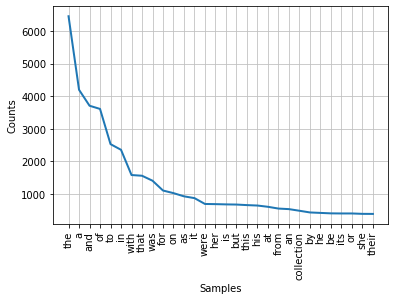

In [56]:
#plot top 30 high frequency words
review_freq.plot(30)

#### 2. Use a bag-of-words approach with stemming and stop words removal


In [58]:
from nltk.corpus import stopwords
stopwords=stopwords.words('english')

In [59]:
#eliminate stop words
review_nostop=[w for w in review_word if w not in stopwords]
review_nostop

['detachment',
 'word',
 'day',
 'dtacher',
 'yes',
 'like',
 'labels',
 'name',
 'bien',
 'sr',
 'designer',
 'mona',
 'kowalska',
 'loves',
 'high',
 'concept',
 'one',
 'imagines',
 'today',
 'detachment',
 'included',
 'unconcerned',
 'gaze',
 'others',
 'kowalskas',
 'woman',
 'appears',
 'runway',
 'real',
 'world',
 'dresses',
 'intensely',
 'arty',
 'bend',
 'taste',
 'clothes',
 'match',
 'make',
 'dtacher',
 'cultishly',
 'beloved',
 'brand',
 'among',
 'certain',
 'shoppers',
 'season',
 'kowalska',
 'presented',
 'lineup',
 'relatively',
 'playful',
 'offerings',
 'collection',
 'opened',
 'pair',
 'midi',
 'dresses',
 'floral',
 'print',
 'reemerged',
 'later',
 'imagined',
 'allover',
 'pop',
 'white',
 'polka',
 'dots',
 'elsewhere',
 'came',
 'cardigans',
 'uncanny',
 'kind',
 'amoxicillin',
 'pink',
 'imagined',
 'dtacher',
 'woman',
 'wearing',
 'tongue',
 'firmly',
 'cheek',
 'allover',
 'holes',
 'boot',
 'popcorn',
 'knits',
 'pretty',
 'fun',
 'choice',
 'use',
 '

In [60]:
len(review_nostop)

67867

In [61]:
nostop_freq=FreqDist(review_nostop)
nostop_freq

FreqDist({'collection': 489, 'new': 357, 'one': 354, 'dresses': 328, 'like': 313, 'show': 295, 'dress': 283, 'spring': 241, 'designer': 232, 'clothes': 226, ...})

In [64]:
nostop_sorted=sorted(nostop_freq.items(), key=lambda k:k[1], reverse=True)
nostop_sorted

[('collection', 489),
 ('new', 357),
 ('one', 354),
 ('dresses', 328),
 ('like', 313),
 ('show', 295),
 ('dress', 283),
 ('spring', 241),
 ('designer', 232),
 ('clothes', 226),
 ('said', 222),
 ('season', 221),
 ('also', 221),
 ('fashion', 205),
 ('made', 201),
 ('pieces', 201),
 ('way', 193),
 ('looks', 192),
 ('look', 191),
 ('white', 184),
 ('black', 184),
 ('came', 181),
 ('silk', 180),
 ('designers', 158),
 ('first', 153),
 ('back', 136),
 ('runway', 132),
 ('could', 129),
 ('well', 128),
 ('would', 128),
 ('pants', 128),
 ('skirts', 127),
 ('time', 125),
 ('leather', 121),
 ('brand', 114),
 ('prints', 113),
 ('even', 111),
 ('today', 107),
 ('women', 107),
 ('still', 105),
 ('long', 105),
 ('denim', 105),
 ('point', 104),
 ('though', 104),
 ('lace', 104),
 ('much', 103),
 ('around', 102),
 ('skirt', 102),
 ('jackets', 102),
 ('jacket', 101),
 ('red', 101),
 ('backstage', 97),
 ('collections', 96),
 ('many', 95),
 ('sense', 93),
 ('print', 91),
 ('worn', 91),
 ('take', 91),
 ('yet

In [104]:
df=pd.DataFrame(nostop_sorted, columns=['words', 'tag'])
df.head(30)

,words,tag
0,collection,489
1,new,357
2,one,354
3,dresses,328
4,like,313
5,show,295
6,dress,283
7,spring,241
8,designer,232
9,clothes,226


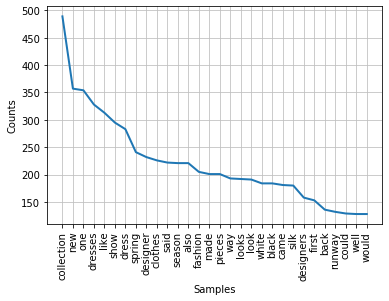

In [66]:
nostop_freq.plot(30)

In [70]:
#use Porter Stemmer
ps=nltk.PorterStemmer()
review_stem=[ps.stem(w) for w in review_nostop]
review_stem

['detach',
 'word',
 'day',
 'dtacher',
 'ye',
 'like',
 'label',
 'name',
 'bien',
 'sr',
 'design',
 'mona',
 'kowalska',
 'love',
 'high',
 'concept',
 'one',
 'imagin',
 'today',
 'detach',
 'includ',
 'unconcern',
 'gaze',
 'other',
 'kowalska',
 'woman',
 'appear',
 'runway',
 'real',
 'world',
 'dress',
 'intens',
 'arti',
 'bend',
 'tast',
 'cloth',
 'match',
 'make',
 'dtacher',
 'cultishli',
 'belov',
 'brand',
 'among',
 'certain',
 'shopper',
 'season',
 'kowalska',
 'present',
 'lineup',
 'rel',
 'play',
 'offer',
 'collect',
 'open',
 'pair',
 'midi',
 'dress',
 'floral',
 'print',
 'reemerg',
 'later',
 'imagin',
 'allov',
 'pop',
 'white',
 'polka',
 'dot',
 'elsewher',
 'came',
 'cardigan',
 'uncanni',
 'kind',
 'amoxicillin',
 'pink',
 'imagin',
 'dtacher',
 'woman',
 'wear',
 'tongu',
 'firmli',
 'cheek',
 'allov',
 'hole',
 'boot',
 'popcorn',
 'knit',
 'pretti',
 'fun',
 'choic',
 'use',
 'hardier',
 'materi',
 'lent',
 'dress',
 'eccentr',
 'volum',
 'also',
 'led

In [71]:
stem_freq=FreqDist(review_stem)
stem_sorted=sorted(stem_freq.items(), key=lambda k:k[1], reverse=True)
stem_sorted

[('dress', 660),
 ('collect', 601),
 ('design', 499),
 ('look', 492),
 ('show', 431),
 ('one', 393),
 ('new', 364),
 ('like', 360),
 ('season', 293),
 ('print', 278),
 ('spring', 256),
 ('piec', 248),
 ('cloth', 243),
 ('way', 234),
 ('skirt', 230),
 ('fashion', 226),
 ('said', 222),
 ('also', 221),
 ('jacket', 203),
 ('made', 201),
 ('silk', 190),
 ('white', 186),
 ('black', 186),
 ('came', 181),
 ('time', 170),
 ('even', 167),
 ('work', 164),
 ('thing', 161),
 ('brand', 157),
 ('first', 153),
 ('top', 152),
 ('back', 151),
 ('make', 148),
 ('runway', 145),
 ('pant', 144),
 ('color', 143),
 ('inspir', 142),
 ('point', 141),
 ('today', 140),
 ('style', 137),
 ('feel', 135),
 ('fabric', 134),
 ('take', 132),
 ('could', 129),
 ('go', 129),
 ('well', 128),
 ('would', 128),
 ('knit', 126),
 ('use', 126),
 ('leather', 126),
 ('suit', 124),
 ('pair', 122),
 ('women', 122),
 ('want', 120),
 ('lace', 120),
 ('wear', 118),
 ('come', 118),
 ('seem', 118),
 ('girl', 113),
 ('silhouett', 110),
 ('

In [106]:
df=pd.DataFrame(stem_sorted, columns=['words', 'tag'])
df.head(30)

,words,tag
0,dress,660
1,collect,601
2,design,499
3,look,492
4,show,431
5,one,393
6,new,364
7,like,360
8,season,293
9,print,278


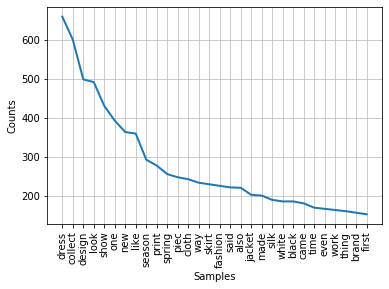

In [72]:
stem_freq.plot(30)

In [75]:
#use Lancaster Stemmer
ls=nltk.LancasterStemmer()
review_ls=[ls.stem(w) for w in review_nostop]
ls_freq=FreqDist(review_ls)
ls_sorted=sorted(ls_freq.items(), key=lambda k:k[1], reverse=True)
ls_sorted

[('dress', 662),
 ('collect', 603),
 ('design', 499),
 ('look', 493),
 ('show', 432),
 ('on', 394),
 ('new', 384),
 ('lik', 361),
 ('season', 295),
 ('print', 282),
 ('piec', 248),
 ('spring', 241),
 ('cloth', 240),
 ('way', 235),
 ('skirt', 231),
 ('fash', 226),
 ('said', 222),
 ('also', 221),
 ('ev', 220),
 ('wom', 215),
 ('mad', 207),
 ('jacket', 203),
 ('us', 201),
 ('silk', 192),
 ('whit', 188),
 ('black', 187),
 ('cam', 182),
 ('tim', 171),
 ('work', 168),
 ('real', 165),
 ('wear', 164),
 ('top', 163),
 ('styl', 163),
 ('thing', 161),
 ('col', 161),
 ('tak', 160),
 ('brand', 157),
 ('first', 153),
 ('mak', 151),
 ('sens', 151),
 ('back', 151),
 ('runway', 145),
 ('lin', 145),
 ('pant', 144),
 ('inspir', 142),
 ('point', 142),
 ('today', 140),
 ('cre', 137),
 ('art', 137),
 ('com', 136),
 ('feel', 135),
 ('fabr', 134),
 ('seem', 131),
 ('could', 129),
 ('suit', 128),
 ('wel', 128),
 ('would', 128),
 ('knit', 126),
 ('leath', 126),
 ('pair', 122),
 ('want', 121),
 ('lac', 121),
 ('

In [107]:
df=pd.DataFrame(ls_sorted, columns=['words', 'tag'])
df.head(30)

,words,tag
0,dress,662
1,collect,603
2,design,499
3,look,493
4,show,432
5,on,394
6,new,384
7,lik,361
8,season,295
9,print,282


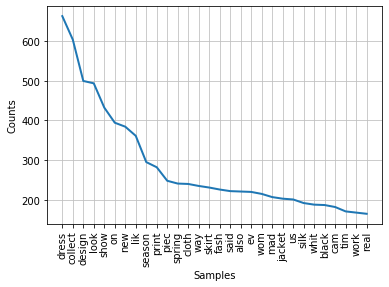

In [76]:
ls_freq.plot(30)

#### 3. Use POS approach and focus on all the noun forms (NN, NNP, NNS, NNPS)

In [77]:
# generate POS tags
review_POS=nltk.pos_tag(review_token)
review_POS

[('0', 'CD'),
 (',', ','),
 ("''", "''"),
 ('Detachment', 'NNP'),
 ('was', 'VBD'),
 ('the', 'DT'),
 ('word', 'NN'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('day', 'NN'),
 ('at', 'IN'),
 ('A', 'NNP'),
 ('Dtacher', 'NNP'),
 ('(', '('),
 ('yes', 'UH'),
 (',', ','),
 ('like', 'IN'),
 ('the', 'DT'),
 ('labels', 'NNS'),
 ('name', 'NN'),
 (',', ','),
 ('bien', 'VB'),
 ('sr', 'NN'),
 (')', ')'),
 ('.', '.'),
 ('Designer', 'NNP'),
 ('Mona', 'NNP'),
 ('Kowalska', 'NNP'),
 ('loves', 'VBZ'),
 ('the', 'DT'),
 ('high', 'JJ'),
 ('concept', 'NN'),
 (',', ','),
 ('and', 'CC'),
 ('one', 'CD'),
 ('imagines', 'NNS'),
 ('that', 'WDT'),
 ('today', 'NN'),
 ('detachment', 'NN'),
 ('included', 'VBD'),
 ('being', 'VBG'),
 ('unconcerned', 'VBN'),
 ('with', 'IN'),
 ('the', 'DT'),
 ('gaze', 'NN'),
 ('of', 'IN'),
 ('others', 'NNS'),
 ('.', '.'),
 ('Kowalskas', 'NNP'),
 ('woman', 'NN'),
 (',', ','),
 ('both', 'CC'),
 ('as', 'IN'),
 ('she', 'PRP'),
 ('appears', 'VBZ'),
 ('on', 'IN'),
 ('the', 'DT'),
 ('runway', 'NN'),
 ('an

In [78]:
# keep words that has POS tag starts with N
POS_N=[(w,t) for (w,t) in review_POS if t.startswith('N')]
POS_N

[('Detachment', 'NNP'),
 ('word', 'NN'),
 ('day', 'NN'),
 ('A', 'NNP'),
 ('Dtacher', 'NNP'),
 ('labels', 'NNS'),
 ('name', 'NN'),
 ('sr', 'NN'),
 ('Designer', 'NNP'),
 ('Mona', 'NNP'),
 ('Kowalska', 'NNP'),
 ('concept', 'NN'),
 ('imagines', 'NNS'),
 ('today', 'NN'),
 ('detachment', 'NN'),
 ('gaze', 'NN'),
 ('others', 'NNS'),
 ('Kowalskas', 'NNP'),
 ('woman', 'NN'),
 ('runway', 'NN'),
 ('world', 'NN'),
 ('herself', 'NN'),
 ('bend', 'NN'),
 ('taste', 'NN'),
 ('clothes', 'NNS'),
 ('Dtacher', 'NNP'),
 ('brand', 'NN'),
 ('shoppers', 'NNS'),
 ('season', 'NN'),
 ('Kowalska', 'NNP'),
 ('lineup', 'NN'),
 ('offerings', 'NNS'),
 ('collection', 'NN'),
 ('pair', 'NN'),
 ('midi', 'NN'),
 ('dresses', 'NNS'),
 ('print', 'NN'),
 ('Pop', 'NNP'),
 ('polka', 'NN'),
 ('dots', 'NNS'),
 ('cardigans', 'NNS'),
 ('kind', 'NN'),
 ('amoxicillin', 'NN'),
 ('A', 'NNP'),
 ('Dtacher', 'NNP'),
 ('woman', 'NN'),
 ('tongue', 'NN'),
 ('firmly', 'NN'),
 ('cheek', 'NN'),
 ('Kawakubo-esque', 'NNP'),
 ('allover', 'NN'),
 ('h

In [80]:
POS_N_freq=FreqDist(POS_N)
POS_N_sorted=sorted(POS_N_freq.items(), key=lambda k:k[1], reverse=True)
POS_N_sorted

[(('collection', 'NN'), 480),
 (('dresses', 'NNS'), 302),
 (('dress', 'NN'), 270),
 (('show', 'NN'), 250),
 (('designer', 'NN'), 228),
 (('clothes', 'NNS'), 223),
 (('season', 'NN'), 219),
 (('pieces', 'NNS'), 196),
 (('way', 'NN'), 191),
 (('silk', 'NN'), 168),
 (('Spring', 'NN'), 165),
 (('fashion', 'NN'), 160),
 (('designers', 'NNS'), 150),
 (('looks', 'NNS'), 138),
 (('skirts', 'NNS'), 126),
 (('pants', 'NNS'), 125),
 (('runway', 'NN'), 123),
 (('time', 'NN'), 123),
 (('look', 'NN'), 117),
 (('brand', 'NN'), 110),
 (('prints', 'NNS'), 109),
 (('New', 'NNP'), 109),
 (('women', 'NNS'), 104),
 (('lace', 'NN'), 102),
 (('jacket', 'NN'), 101),
 (('skirt', 'NN'), 101),
 (('point', 'NN'), 100),
 (('jackets', 'NNS'), 100),
 (('collections', 'NNS'), 96),
 (('today', 'NN'), 93),
 (('leather', 'NN'), 92),
 (('sense', 'NN'), 90),
 (('denim', 'NN'), 90),
 (('print', 'NN'), 89),
 (('York', 'NNP'), 88),
 (('things', 'NNS'), 86),
 (('models', 'NNS'), 83),
 (('cotton', 'NN'), 82),
 (('color', 'NN')

In [108]:
df=pd.DataFrame(POS_N_sorted, columns=['words', 'tag'])
df.head(30)

,words,tag
0,"(collection, NN)",480
1,"(dresses, NNS)",302
2,"(dress, NN)",270
3,"(show, NN)",250
4,"(designer, NN)",228
5,"(clothes, NNS)",223
6,"(season, NN)",219
7,"(pieces, NNS)",196
8,"(way, NN)",191
9,"(silk, NN)",168


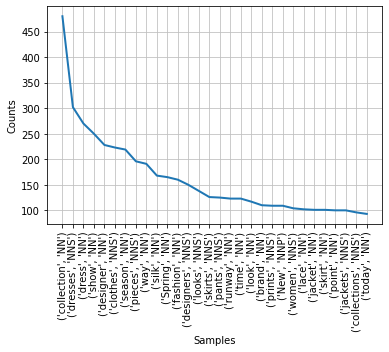

In [83]:
POS_N_freq.plot(30)

#### 4. Use POS approach and only focus on NNP

In [85]:
#keep words that has POS tag exactly as NNP
POS_NNP=[(w,t) for (w,t) in review_POS if t=="NNP"]
POS_NNP

[('Detachment', 'NNP'),
 ('A', 'NNP'),
 ('Dtacher', 'NNP'),
 ('Designer', 'NNP'),
 ('Mona', 'NNP'),
 ('Kowalska', 'NNP'),
 ('Kowalskas', 'NNP'),
 ('Dtacher', 'NNP'),
 ('Kowalska', 'NNP'),
 ('Pop', 'NNP'),
 ('A', 'NNP'),
 ('Dtacher', 'NNP'),
 ('Kawakubo-esque', 'NNP'),
 ('Kowalskas', 'NNP'),
 ('Spring', 'NNP'),
 ('A', 'NNP'),
 ('Dtacher', 'NNP'),
 ('Facult', 'NNP'),
 ('Mdecine', 'NNP'),
 ('Paris', 'NNP'),
 ('Descartes', 'NNP'),
 ('Triumphs', 'NNP'),
 ('Vandevorst', 'NNP'),
 ('East', 'NNP'),
 ('West', 'NNP'),
 ('Hence', 'NNP'),
 ('Chinese', 'NNP'),
 ('Chanel-meets-Mongolia', 'NNP'),
 ('Antwerp', 'NNP'),
 ('Vandevorst', 'NNP'),
 ('Road', 'NNP'),
 ('August', 'NNP'),
 ('A.L.C', 'NNP'),
 ('InterLuxe', 'NNP'),
 ('Jason', 'NNP'),
 ('Wu', 'NNP'),
 ('Andrea', 'NNP'),
 ('Lieberman', 'NNP'),
 ('Berber', 'NNP'),
 ('Lieberman', 'NNP'),
 ('A.L.C', 'NNP'),
 ('Lieberman', 'NNP'),
 ('A-line', 'NNP'),
 ('Lieberman', 'NNP'),
 ('A.L.C', 'NNP'),
 ('Jean', 'NNP'),
 ('Touitou', 'NNP'),
 ('APC', 'NNP'),
 ('Kin

In [87]:
POS_NNP_freq=FreqDist(POS_NNP)
POS_NNP_sorted=sorted(POS_NNP_freq.items(), key=lambda k:k[1], reverse=True)
POS_NNP_sorted

[(('New', 'NNP'), 109),
 (('York', 'NNP'), 88),
 (('Spring', 'NNP'), 44),
 (('London', 'NNP'), 43),
 (('Fashion', 'NNP'), 38),
 (('Paris', 'NNP'), 37),
 (('West', 'NNP'), 25),
 (('City', 'NNP'), 22),
 (('A', 'NNP'), 21),
 (('Wang', 'NNP'), 20),
 (('Week', 'NNP'), 19),
 (('Fall', 'NNP'), 19),
 (('Lee', 'NNP'), 19),
 (('T-shirt', 'NNP'), 18),
 (('Milan', 'NNP'), 18),
 (('Im', 'NNP'), 17),
 (('Saint', 'NNP'), 17),
 (('Instagram', 'NNP'), 17),
 (('Japan', 'NNP'), 16),
 (('Johnson', 'NNP'), 16),
 (('East', 'NNP'), 15),
 (('Art', 'NNP'), 15),
 (('Resort', 'NNP'), 15),
 (('Versace', 'NNP'), 15),
 (('A-line', 'NNP'), 14),
 (('David', 'NNP'), 13),
 (('DKNY', 'NNP'), 13),
 (('Anderson', 'NNP'), 13),
 (('Which', 'NNP'), 12),
 (('Chanel', 'NNP'), 12),
 (('English', 'NNP'), 12),
 (('Kate', 'NNP'), 12),
 (('Chlo', 'NNP'), 12),
 (('Italy', 'NNP'), 12),
 (('Gucci', 'NNP'), 12),
 (('Chow', 'NNP'), 12),
 (('Christopher', 'NNP'), 12),
 (('Van', 'NNP'), 12),
 (('Smith', 'NNP'), 12),
 (('Springs', 'NNP'), 

In [109]:
df=pd.DataFrame(POS_NNP_sorted, columns=['words', 'tag'])
df.head(30)

,words,tag
0,"(New, NNP)",109
1,"(York, NNP)",88
2,"(Spring, NNP)",44
3,"(London, NNP)",43
4,"(Fashion, NNP)",38
5,"(Paris, NNP)",37
6,"(West, NNP)",25
7,"(City, NNP)",22
8,"(A, NNP)",21
9,"(Wang, NNP)",20


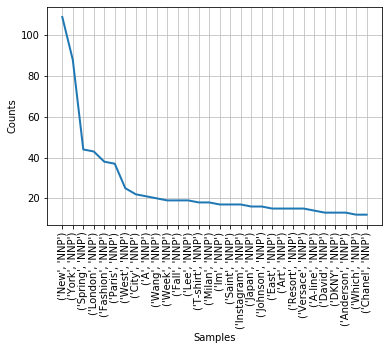

In [88]:
POS_NNP_freq.plot(30)